In [1]:
# ---- Import Libraries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.optimize import linprog
import random

In [3]:
# ---- PART 1: Decision Tree Analysis ----

# Simulate dataset
random.seed(42)
np.random.seed(42)

price = np.random.choice(range(10, 21), 50, replace=True)
ad_budget = np.random.choice(range(1000, 5001, 500), 50, replace=True)
outcome = np.random.choice(['Success', 'Failure'], 50)

df = pd.DataFrame({'Price': price, 'AdBudget': ad_budget, 'Outcome': outcome})

In [5]:
# Train decision tree
X = df[['Price', 'AdBudget']]
y = df['Outcome']

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

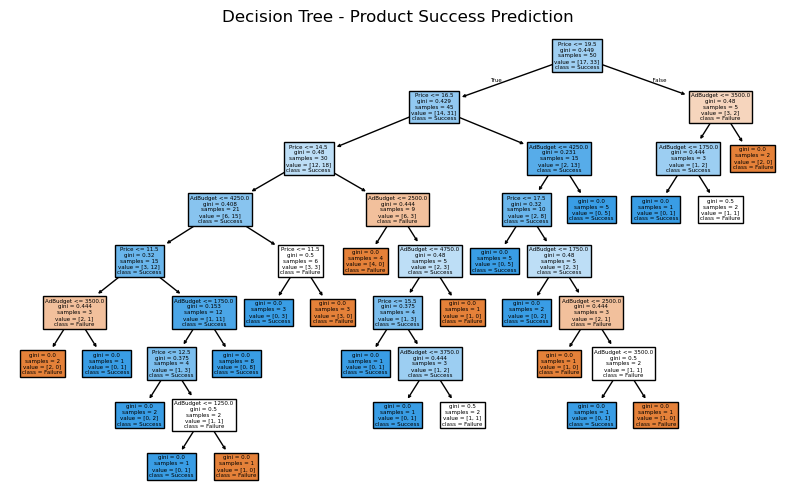

In [7]:
# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['Price', 'AdBudget'], class_names=['Failure', 'Success'], filled=True)
plt.title("Decision Tree - Product Success Prediction")
plt.show()

In [11]:
# ---- PART 2: Profit Optimization ----

# Objective: Maximize 30x + 20y
# Convert to minimization: minimize -30x - 20y
c = [-30, -20]

# Constraints:
# 2x + y <= 100
# x + 3y <= 90
A = [[2, 1], [1, 3]]
b = [100, 90]

# Variable bounds: x >= 0, y >= 0
x_bounds = (0, None)
y_bounds = (0, None)
